# PROJECT CODE: PRCP-1001-RiceLeaf
# PROJECT NAME: Rice Leaf Disease using CNN
# PROJECT TEAM ID: PTID-CDS-JUL21-1172


## Problem definition:
To build a convolutional neural network to classify infected rice leaf images as one of the three major diseases(bacterial leaf blight, brown spot and leaf smut)

# INTRODUCTION
Convolutional neural networks are mainly used for image classification problems. The same is used in this project for classifying images of rice plant infected by either of the three most common rice diseases, that are: 
#### Bacterial leaf blight
#### Brown spot
#### Leaf smut

The dataset given for training and testing the model contained images of rice leaves. There are three classes/diseases: Bacterial leaf blight, Brown spot, and Leaf smut, each having 40 images. The format of all images are jpg.Majority of the images  comprises of the picture of the infected leaf in a white background. These images where uploaded to drive for using in colab, wherin either of the two GPUs (Nvidia Tesla T4 or Nvidia Tesla G80) was allocated for image processing. The project was also tried out in Jupyter notebook, where the system GPU was utilized using the Nvidia CUDA and CuDNN softwares.

## step 1: Import necessary libraries and packages

In [10]:
import tensorflow as tf

In [11]:
from tensorflow import keras

In [12]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from keras_tuner.tuners import RandomSearch
from keras_tuner import HyperModel

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
import matplotlib.pyplot as plt

In [18]:
import pickle

## step 2: Loading the image data set and preprocessing
This is done by using the ImageDataGenerator package from keras. Preprocessing involve setting the shear range and zoom  range to appropriate values and normalizing the images by dividing the pixel intensities by 255 using the recale argument. 

In [19]:
# initialize the ImageDataGenerator
img=ImageDataGenerator(shear_range=0.2,zoom_range=0.2,rescale=1/255)

In [21]:
# load the images from drive/local folder
data=img.flow_from_directory('C:\\Users\\arshad\\OneDrive\\Desktop\\rice disease project',target_size=(225,225),batch_size=119)

Found 119 images belonging to 3 classes.


In [22]:
# splitting the predictors and the target variable
# here the image dataset is stored in x and the target variable(oneHotEncoded labels of the 3 disease classes) is stored in y
x,y=data.next()

## Checking the preprocessed dataset

In [23]:
x[25]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [24]:
x[112].shape

(225, 225, 3)

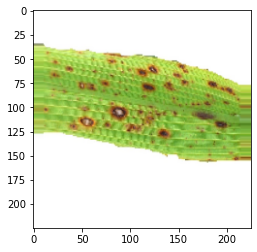

In [25]:
plt.imshow(x[25])

In [26]:
y[25] #brownspot

array([0., 1., 0.], dtype=float32)

In [27]:
x[112]

array([[[0.93725497, 0.8941177 , 0.8705883 ],
        [0.93725497, 0.8941177 , 0.8705883 ],
        [0.93725497, 0.89025086, 0.86672145],
        ...,
        [0.9312935 , 0.8884727 , 0.86290336],
        [0.9333334 , 0.882353  , 0.8588236 ],
        [0.9333334 , 0.882353  , 0.8588236 ]],

       [[0.93725497, 0.8941177 , 0.8705883 ],
        [0.93725497, 0.8941177 , 0.8705883 ],
        [0.93725497, 0.89025086, 0.86672145],
        ...,
        [0.9312935 , 0.8884727 , 0.86290336],
        [0.9333334 , 0.882353  , 0.8588236 ],
        [0.9333334 , 0.882353  , 0.8588236 ]],

       [[0.93725497, 0.8941177 , 0.8705883 ],
        [0.93725497, 0.8941177 , 0.8705883 ],
        [0.93725497, 0.89025086, 0.86672145],
        ...,
        [0.9312935 , 0.8884727 , 0.86290336],
        [0.9333334 , 0.882353  , 0.8588236 ],
        [0.9333334 , 0.882353  , 0.8588236 ]],

       ...,

       [[0.93725497, 0.8941177 , 0.8705883 ],
        [0.93725497, 0.8941177 , 0.8705883 ],
        [0.93725497, 0

In [28]:
x[112].shape

(225, 225, 3)

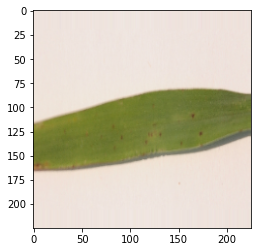

In [29]:
plt.imshow(x[112])

In [30]:
y[112] #leaf smut

array([0., 0., 1.], dtype=float32)

## Spltting the dataset into training and test data

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Hyperparameter tuning and building the model

A suitable CNN architecture is selected after a lot of trial and error and hyper parameter tuning is carried out.
Hyperparameter tuning invovles defining a hypermodel(using HyperModel package from kerastuner API), a build function in which the hyperparameters(hp) are specified and finally running various combinations of the hyperparameters using either RandomSearch, Hyperband or Hyperas packages from kerastuner API

In [32]:
def build_model():
  from kerastuner import HyperModel


class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
      model=keras.Sequential()
      for a in list(range(hp.Int('layers1',min_value=1,max_value=3,step=1,default=1))):
        model.add(Conv2D(filters=hp.Choice('num_filters1'+ str(a),values=(16,32,64)),kernel_size=(3,3),activation='relu',input_shape=(225,225,3)))
      model.add(MaxPool2D(pool_size=(2,2)))
      for b in list(range(hp.Int('layers2',min_value=1,max_value=3,step=1,default=1))):
        model.add(Conv2D(filters=hp.Choice('num_filters2'+str(b),values=(16,32,64)),kernel_size=(3,3),activation='relu'))
      
      model.add(MaxPool2D(pool_size=(2,2)))
      
      model.add(Flatten())
      for c in list(range(hp.Int('dense_layers',min_value=1,max_value=6,default=1))):
        model.add(Dense(units=hp.Int('units'+str(c),min_value=100,max_value=10000,step=20),activation='relu'))
      model.add(Dense(3,activation='softmax'))
      model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr',values=(1e-1,1e-2,1e-3,1e-4))),
              metrics='accuracy')
      return model
hypermodel=CNNHyperModel(input_shape=(225,225,3),num_classes=3)

In [26]:
# option 1
#from keras_tuner.tuners import Hyperband
#tuner = Hyperband(
#    hypermodel,
#    max_epochs=10,
#    objective='val_accuracy',
#    seed=42,
    
#    executions_per_trial=1,
#    directory='hyperband',
#    project_name='rice2'
#)



In [33]:
# option 2
tuner=RandomSearch(hypermodel,
                   objective='val_accuracy',
                   max_trials=65,
                   executions_per_trial=1)

## Checking the hyperparameters and assigned values for each

In [34]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
layers1 (Int)
{'default': 1, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
num_filters10 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': True}
layers2 (Int)
{'default': 1, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
num_filters20 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': True}
dense_layers (Int)
{'default': 2, 'conditions': [], 'min_value': 1, 'max_value': 6, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 1200, 'step': 20, 'sampling': None}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 1200, 'step': 20, 'sampling': None}
lr (Choice)
{'default': 0.1, 'conditions': [], 'values': (0.1, 0.01, 0.001, 0.0001), 'ordered': True}


# Running the tuner

In [35]:
tuner.search(x_train,y_train,validation_split=0.2,epochs=10)

Trial 65 Complete [00h 03m 01s]
val_accuracy: 0.4736842215061188

Best val_accuracy So Far: 0.7368420958518982
Total elapsed time: 03h 54m 44s
INFO:tensorflow:Oracle triggered exit


In [36]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
layers1: 3
num_filters10: 64
layers2: 1
num_filters20: 64
dense_layers: 1
units0: 180
units1: 220
lr: 0.001
num_filters11: 32
units2: 120
units3: 700
units4: 180
num_filters21: 32
num_filters22: 64
units5: 100
num_filters12: 32
Score: 0.7368420958518982
Trial summary
Hyperparameters:
layers1: 1
num_filters10: 64
layers2: 3
num_filters20: 16
dense_layers: 3
units0: 520
units1: 420
lr: 0.001
num_filters11: 64
units2: 580
units3: 620
units4: 1020
num_filters21: 32
num_filters22: 32
units5: 680
num_filters12: 16
Score: 0.6842105388641357
Trial summary
Hyperparameters:
layers1: 2
num_filters10: 16
layers2: 3
num_filters20: 16
dense_layers: 2
units0: 880
units1: 340
lr: 0.001
num_filters11: 32
units2: 220
units3: 800
units4: 860
num_filters21: 64
num_filters22: 16
units5: 1120
num_filters12: 64
Score: 0.6842105388641357
Trial summary
Hyperparamet

# Saving the best model

In [37]:
best_model = tuner.get_best_models(num_models=1)[0]
saved_cnn_model=pickle.dumps(best_model)

# Testing the model

In [38]:
riceDiseaseModel=pickle.loads(saved_cnn_model)
loss, accuracy = riceDiseaseModel.evaluate(x_test, y_test)

1/1 [==============================] - 5s 5s/step - loss: 0.8943 - accuracy: 0.7500


# Project Analysis

Like any other machine learning project, the first step in the rice leaf disease prediction project was to gain sufficient domain knowledge. A couple of research papers regarding the subject matter were read for the same. We understood that these 3 diseases manifest unique external visible changes on the rice leaf.
• Leaf smut: small black linear lesions on leaf blades, leaf tips may turn grey and dry.
• Bacterial blight: elongated lesions near the leaf tips and margins, and turns white to yellow and then grey due to fungal attack.
• Brown spot: dark brown colored and round to oval-shaped
  lesions on rice leaves.
The next step was to find out a way to load the given image dataset containing an equal number of images for the three classes. For this, the ImageDataGenerator package from Keras was used. The same package was used to preprocess the images. Following image loading and preprocessing, we considered various architectures available to build the convolutional neural network and did a lot of trial and error to find out the most accurate one. The final and most tedious step was hyperparameter tuning, which was done using the RandomSearch and Hyperband packages from kerastuner.RandomSearch was found to be more convenient for hyperparameter tuning of the CNN model. After running a considerable number of trials with the training dataset(80% of the whole dataset), where the validation accuracy(with 20% of training dataset acting as validation data) was monitored for each combination of hyperparameters, the best model was selected and saved. The saved model was then tested for accuracy with the test data.
We were able to reach 75% accuracy. Even when we could use powerful GPUs like Nvidia Tesla T4 and Nvidia Tesla G80 in google colab, due to weak network we faced recurrent session crashes. The project was also tried out in Jupyter notebook, where the system GPU was utilized using the Nvidia CUDA and CuDNN software, but running the code for a long time was not feasible with this method too as the kernel got dead several times in between the process.
In conclusion, with a stronger GPU or a stable internet connection, the same code can be used to get a model with higher accuracy. 